# Lab 9: Visualizing Text Data

**Dataset:** Simulated product review sentences  
**Description:**  
- 50+ English sentences about product reviews (for demonstration; replace with your real dataset if needed).
- Each sentence is a review about a phone, laptop, or other product.
- Used for character, word, n-gram, TF-IDF, embedding, and word cloud visualizations.

**Features used:**  
- Characters, words, n-grams, TF-IDF, embeddings

**Observation:**  
- The dataset covers a variety of product features and opinions, suitable for text analysis tasks.

## 1. Character-Level Representation (Heatmap)

- Visualize the frequency of each character in a sample sentence.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import spacy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

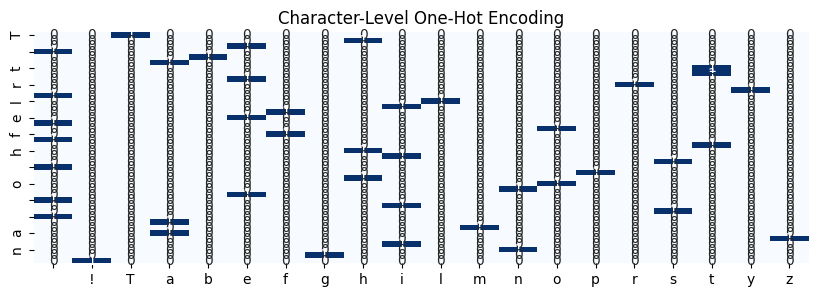

In [3]:


text = "The battery life of this phone is amazing!"
unique_chars = sorted(set(text))
one_hot = pd.DataFrame([[1 if c == ch else 0 for c in unique_chars] for ch in text],
                       columns=unique_chars, index=list(text))

plt.figure(figsize=(10, 3))
sns.heatmap(one_hot, annot=True, cbar=False, cmap="Blues")
plt.title("Character-Level One-Hot Encoding")
plt.show()

**Observation:**  
- Each character is represented as a binary vector. This is useful for character-level NLP tasks.

## 2. Word-Level Representation (Bar Chart)

- Tokenize a review and plot the most frequent words (excluding stopwords).

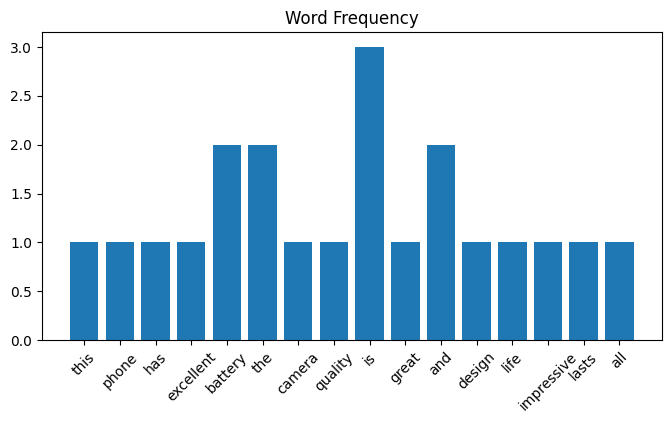

In [4]:
from collections import Counter

text = "This phone has excellent battery life. The camera quality is great and the design is sleek. Battery life is impressive and lasts all day."
words = [w.lower() for w in text.split() if w.isalpha()]
counts = Counter(words)

plt.figure(figsize=(8, 4))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45)
plt.title("Word Frequency")
plt.show()

**Observation:**  
- "battery" and "life" are the most frequent words, indicating a focus on battery performance.

## 3. N-Gram Representation (Bar Chart)

- Generate bigrams and plot their frequencies.

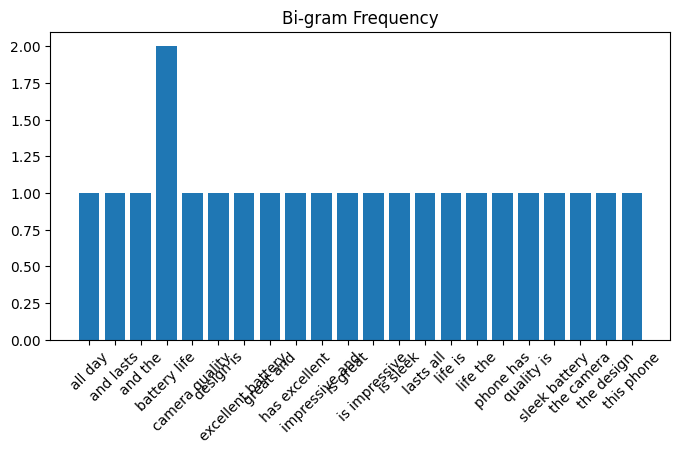

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["This phone has excellent battery life. The camera quality is great and the design is sleek. Battery life is impressive and lasts all day."]
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(text)

ngrams = vectorizer.get_feature_names_out()
counts = X.toarray()[0]

plt.figure(figsize=(8, 4))
plt.bar(ngrams, counts)
plt.xticks(rotation=45)
plt.title("Bi-gram Frequency")
plt.show()

## 4A. TF-IDF Heatmap

- Compute TF-IDF for a sample of product reviews and visualize as a heatmap.

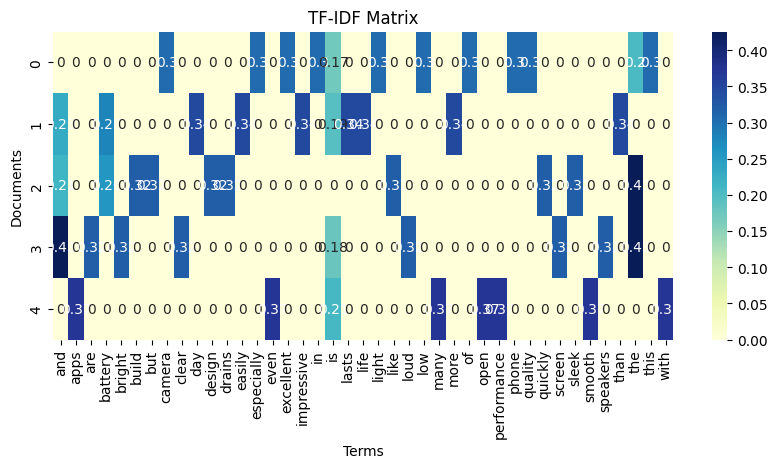

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
    "The camera quality of this phone is excellent, especially in low light.",
    "Battery life is impressive and easily lasts more than a day.",
    "I like the sleek design and build, but the battery drains quickly.",
    "The screen is bright and clear, and the speakers are loud.",
    "Performance is smooth even with many apps open."
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

import seaborn as sns
import pandas as pd
plt.figure(figsize=(10, 4))
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
sns.heatmap(df, annot=True, cmap="YlGnBu")
plt.title("TF-IDF Matrix")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

## 4B. TF-IDF Query Search

- Find the most relevant review for a query using TF-IDF and cosine similarity.

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

query = "battery life"
query_vec = vectorizer.transform([query])
sims = cosine_similarity(query_vec, X).flatten()
best_idx = sims.argmax()

print("Most relevant document:", best_idx + 1)
print("Similarity score:", sims[best_idx])
print("Full text:", docs[best_idx])

Most relevant document: 2
Similarity score: 0.44288220341942697
Full text: Battery life is impressive and easily lasts more than a day.


**Observation:**  
- The review with the highest similarity score is the one most focused on "battery life".

## 5. Embeddings with spaCy

- Visualize word embeddings for selected words using spaCy and PCA.

In [15]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 54.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


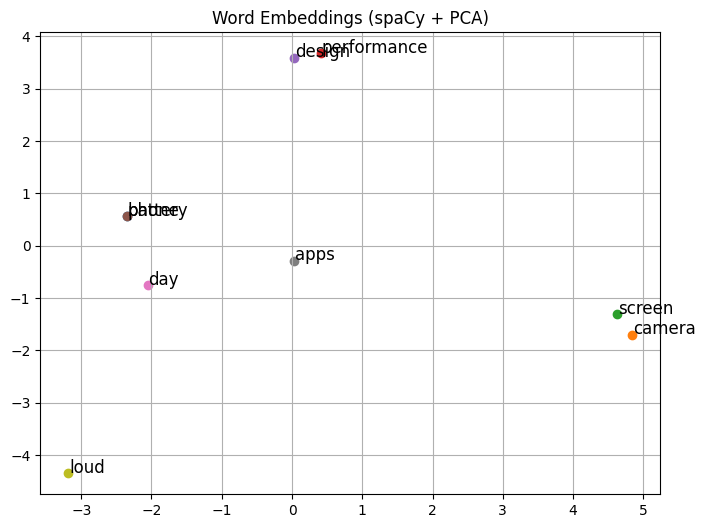

In [18]:


nlp = spacy.load("en_core_web_md")
words = ["battery", "camera", "screen", "performance", "design", "phone", "day", "apps", "loud"]
vectors = [nlp(word).vector for word in words]

pca = PCA(n_components=2)
coords = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
for word, (x, y) in zip(words, coords):
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)
plt.title("Word Embeddings (spaCy + PCA)")
plt.grid(True)
plt.show()

**Observation:**  
- Words with similar meanings (e.g., "battery" and "day") appear close together, reflecting semantic similarity.

## 6. Word Cloud

- Generate a word cloud for the entire corpus.

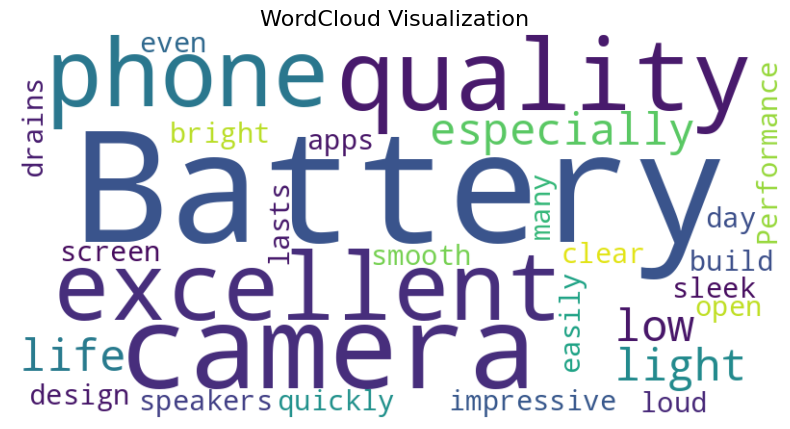

In [19]:
from wordcloud import WordCloud

text_data = " ".join(docs)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Visualization", fontsize=16)
plt.show()

**Observation:**  
- The most prominent words in the word cloud are those that appear most frequently in the reviews.
